Brand Switching Simulation Results:
State  Frequency
    B          1
    A         12
    C          8


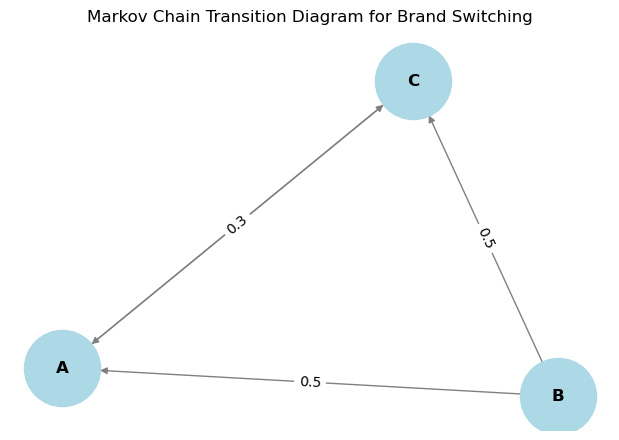

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define the transition probability matrix
# States: B (0), A (1), C (2)
P = np.array([[0.0, 0.5, 0.5],  # B -> (A: 0.5, C: 0.5)
              [0.0, 0.6, 0.4],  # A -> (A: 0.6, C: 0.4)
              [0.0, 0.3, 0.7]]) # C -> (A: 0.3, C: 0.7)

# Function to simulate the Markov process
def simulate_markov_chain(P, start_state, steps):
    state = start_state
    history = [state]
    for _ in range(steps):
        state = np.random.choice([0, 1, 2], p=P[state])
        history.append(state)
    return history

# Simulating 20 steps starting from state B (0)
np.random.seed(42)
steps = simulate_markov_chain(P, start_state=0, steps=20)

# Count occurrences of each state in the simulation
unique, counts = np.unique(steps, return_counts=True)
state_frequencies = dict(zip(unique, counts))

# Create a DataFrame for the results
state_labels = {0: "B", 1: "A", 2: "C"}
results_df = pd.DataFrame({
    "State": [state_labels[state] for state in unique],
    "Frequency": counts
})

# Print the results in table format
print("Brand Switching Simulation Results:")
print(results_df.to_string(index=False))

# Plotting the transition diagram using NetworkX
def draw_markov_graph(P, labels):
    G = nx.DiGraph()
    states = range(len(labels))

    # Add edges with probabilities
    for i in states:
        for j in states:
            if P[i, j] > 0:
                G.add_edge(labels[i], labels[j], weight=P[i, j])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 4))

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=12, font_weight="bold")
    
    # Draw edge labels (probabilities)
    edge_labels = {(labels[i], labels[j]): f"{P[i, j]:.1f}" for i in states for j in states if P[i, j] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Markov Chain Transition Diagram for Brand Switching")
    plt.show()

# Define labels for brands
labels = {0: "B", 1: "A", 2: "C"}
draw_markov_graph(P, labels)